In [21]:
import pandas as pd
data_1 = pd.read_csv('../data/actuator_test_data_1.csv', skiprows=10, sep=';',decimal=',')
data_1.head()

Time stamp - Timestamp  Distance 1 - MeasSignal  1 - Intensity  \
0                627.0146                 6.482672         0.7380   
1                627.0246                 6.482060         0.7380   
2                627.0353                 6.482876         0.7371   
3                627.0453                 6.482101         0.7380   
4                627.0553                 6.483202         0.7380   

   Statistics min - Statistic  Statistics max - Statistic  \
0                    6.356926                    6.741793   
1                    6.356926                    6.741793   
2                    6.356926                    6.741793   
3                    6.356926                    6.741793   
4                    6.356926                    6.741793   

   Peak-to-peak - Statistic  Shutter - ValueBox  Measuring rate - ValueBox  
0                  0.384866               6.438                         10  
1                  0.384866               6.425                         10  
2                  0.384866               6.425                         10  
3                  0.384866               6.425                         10  
4                  0.384866               6.463                         10

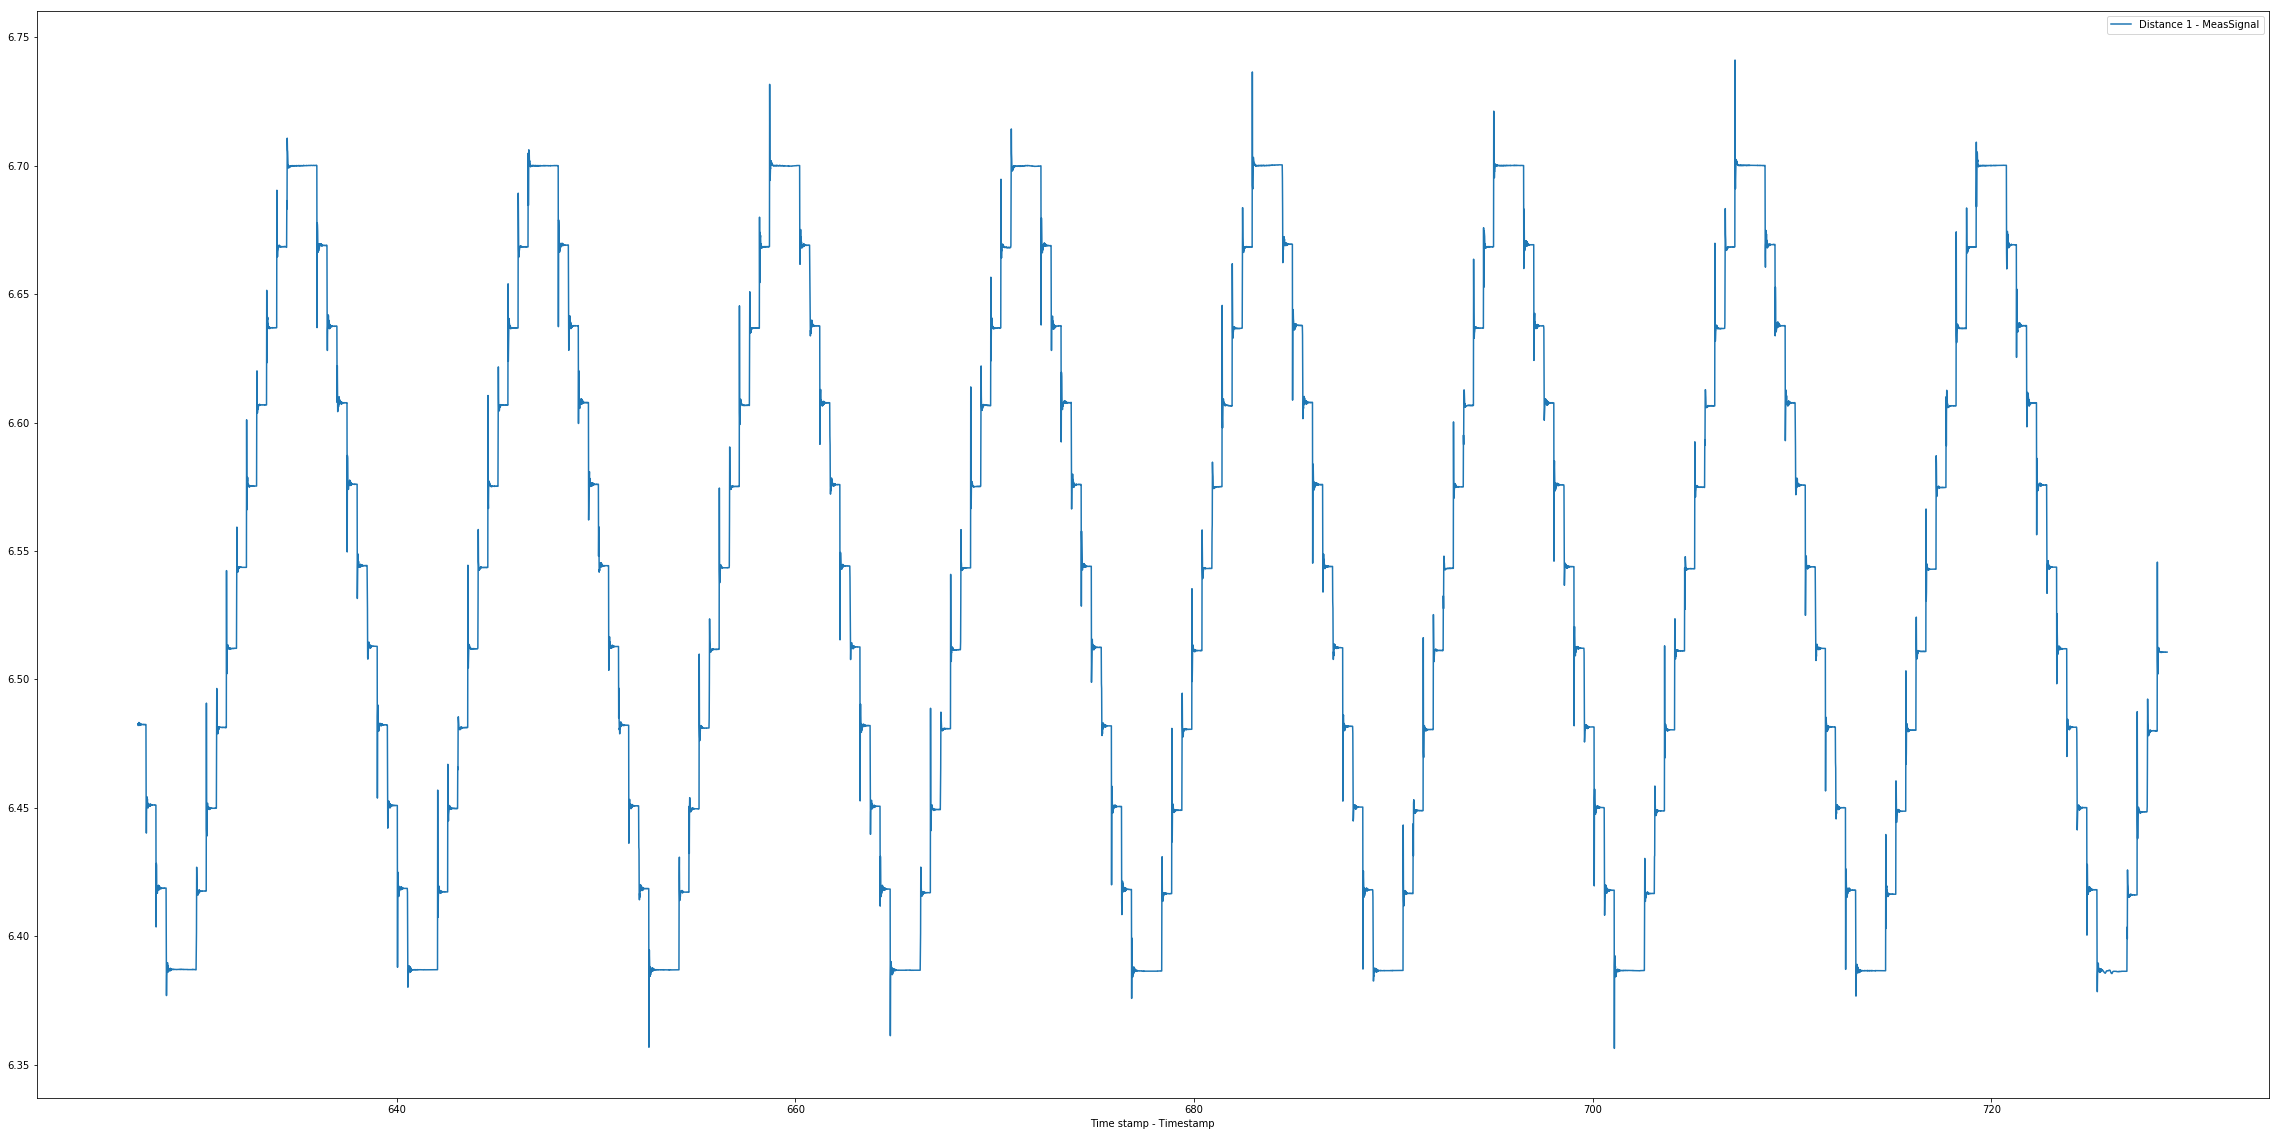

In [40]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
data_1 = pd.read_csv('../data/actuator_test_data_1.csv', skiprows=10, sep=';',decimal=',')
data_1.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal", figsize=(40,20))

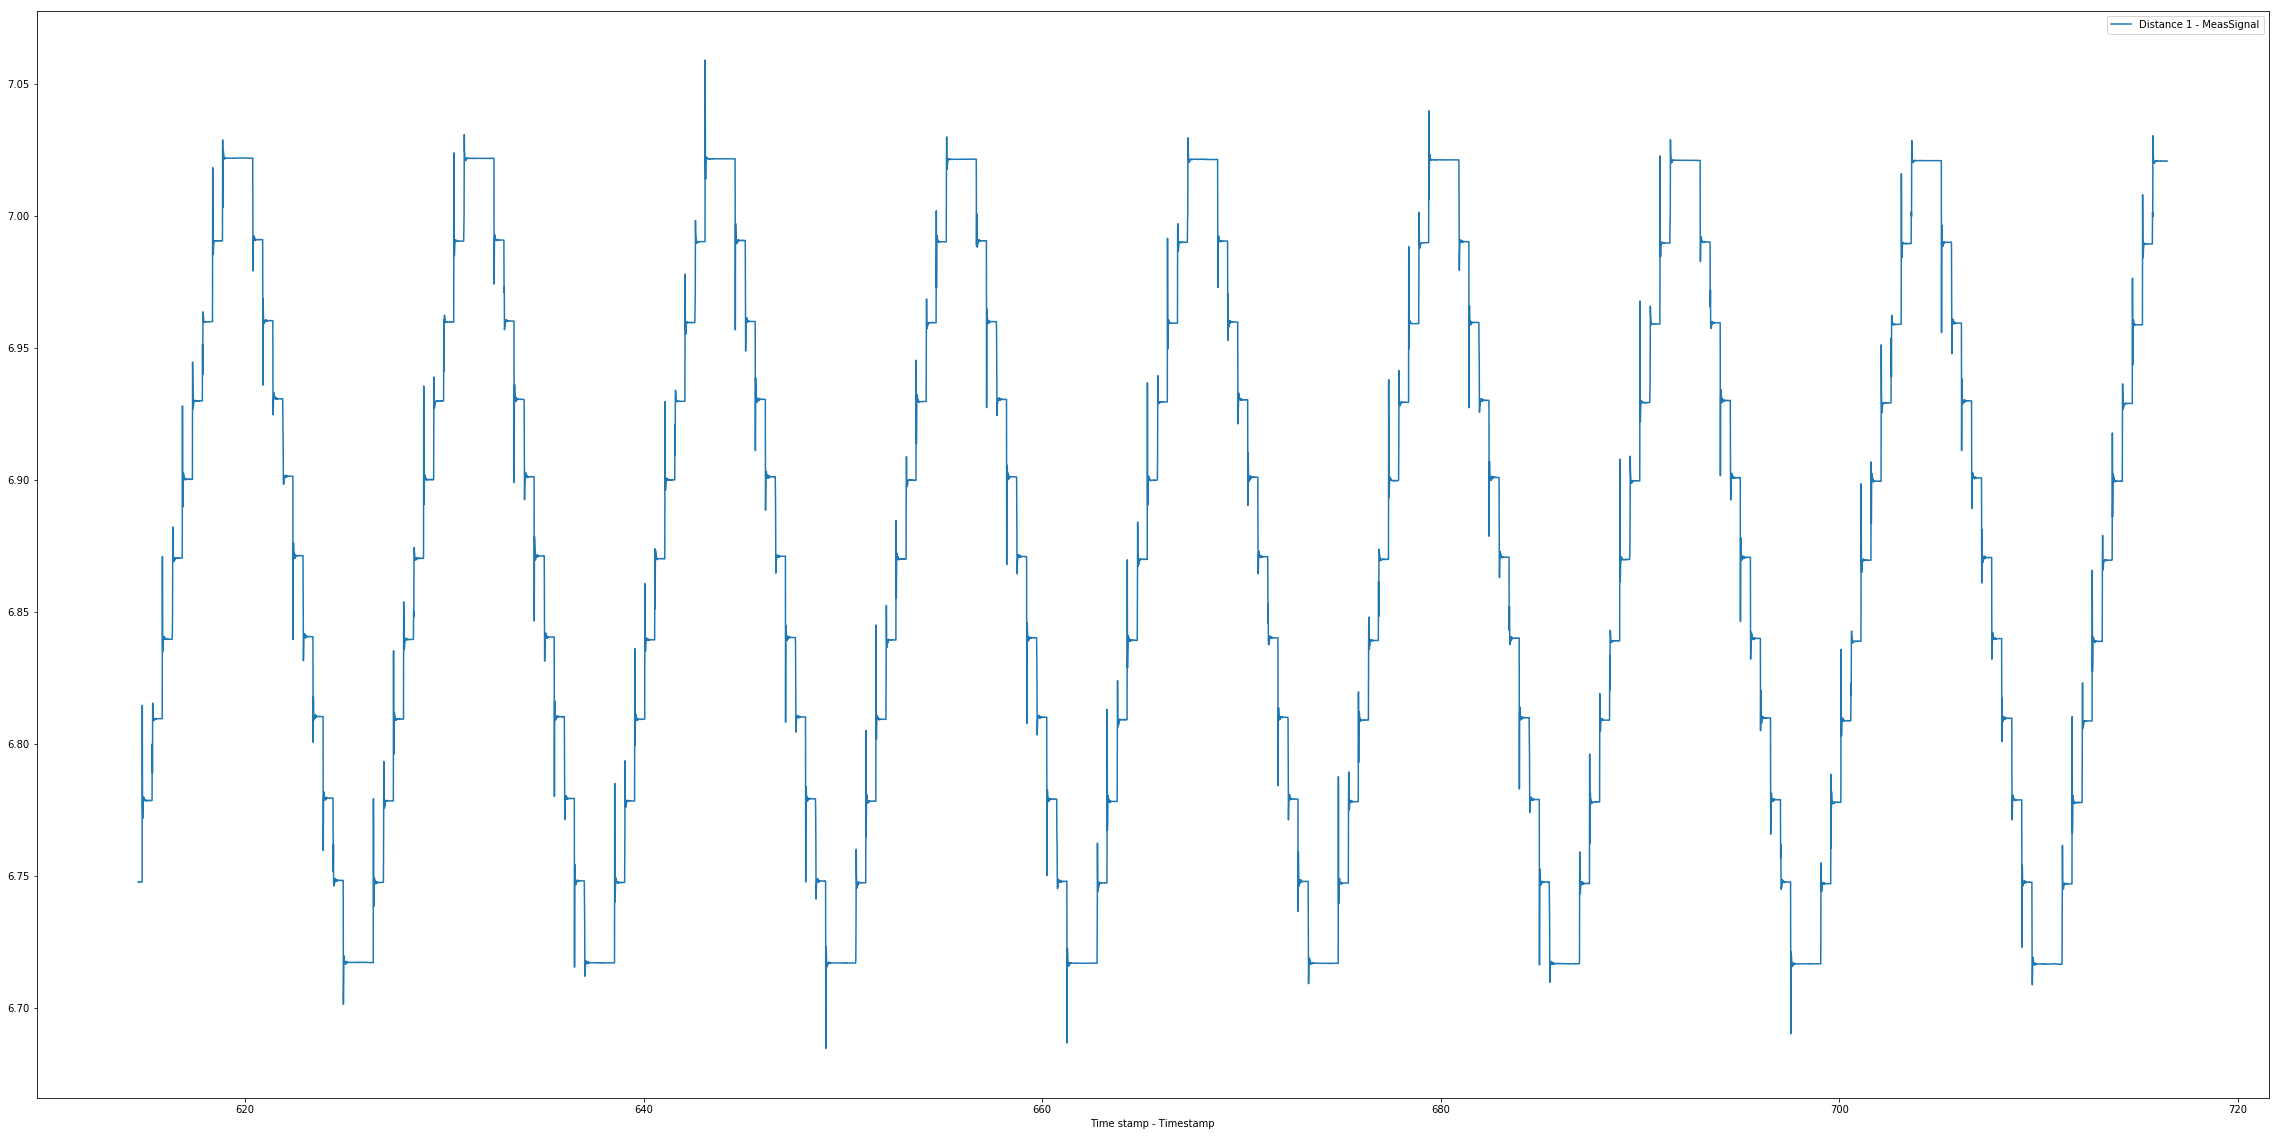

In [41]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
data_2 = pd.read_csv('../data/actuator_test_data_2.csv', skiprows=10, sep=';',decimal=',')
data_2.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal", figsize=(40,20))

(629, 642)

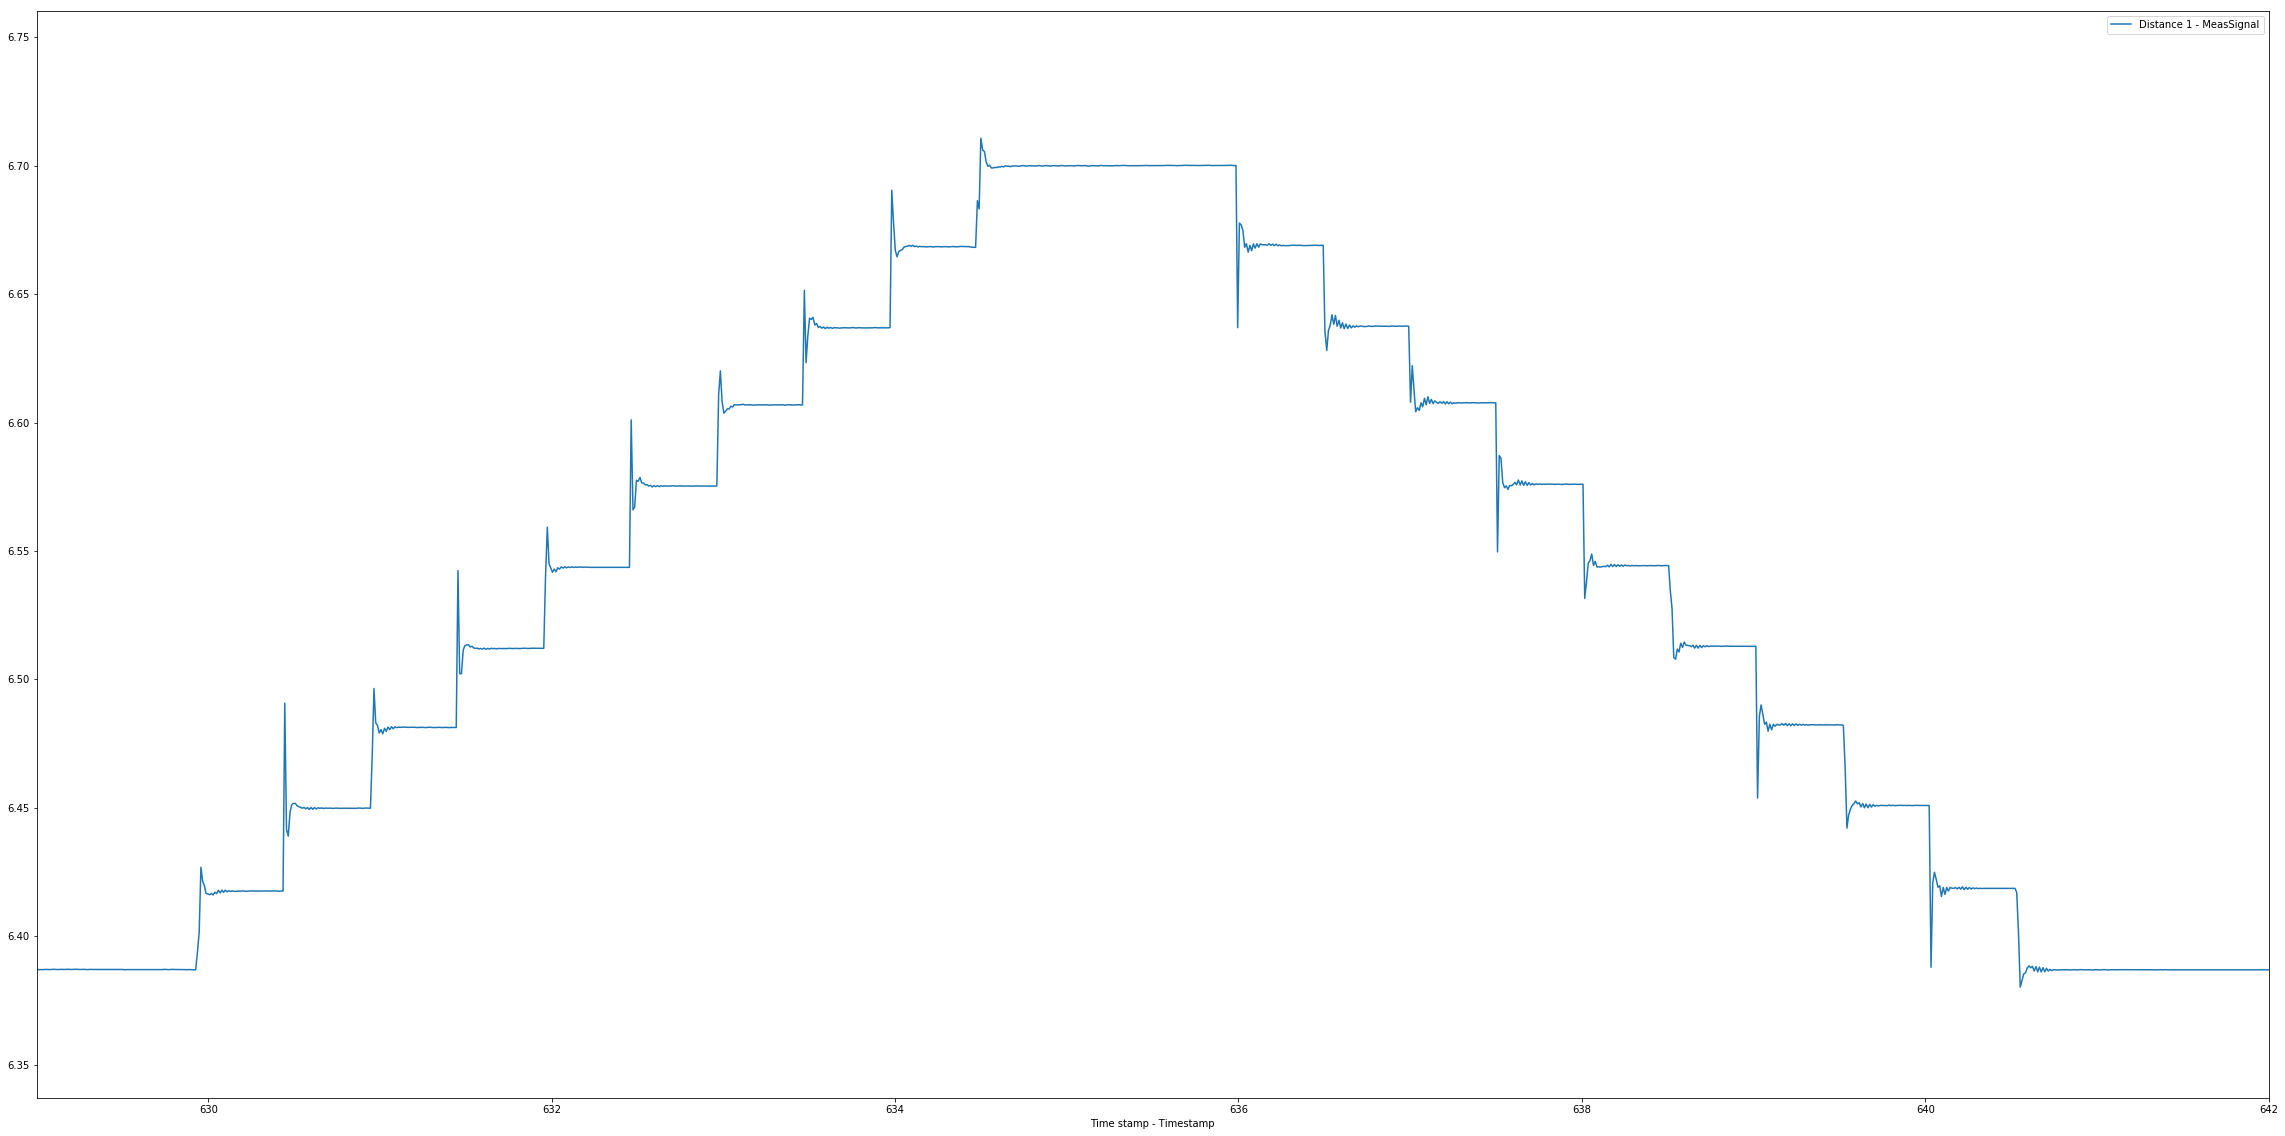

In [10]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

data_1 = pd.read_csv('../data/actuator_test_data_1.csv', skiprows=10, sep=';',decimal=',')
fig = data_1.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal", figsize=(40,20))
fig.set_xlim(629,642)

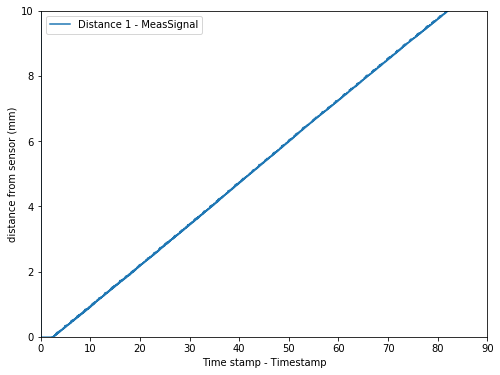

In [87]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt

data_3 = pd.read_csv('../data/actuator_test_data_3.csv', skiprows=10, sep=';',decimal=',')
fig = data_3.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal",figsize=(8,6))
fig.set_ylim(0,10)
fig.set_xlim(0,90)
fig.set_ylabel('distance from sensor (mm)')
plt.savefig('actuator_test_plot2.png', dpi=100)

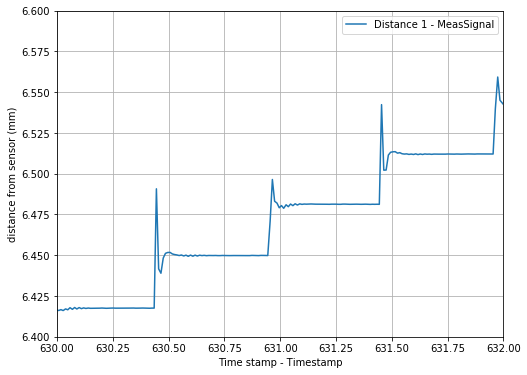

In [88]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

data_1 = pd.read_csv('../data/actuator_test_data_1.csv', skiprows=10, sep=';',decimal=',')
fig = data_1.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal", figsize=(8,6), grid="true")
fig.set_xlim(630,632)
fig.set_ylim(6.4,6.6)
fig.set_ylabel('distance from sensor (mm)')
plt.savefig('actuator_test_plot1.png', dpi=100)

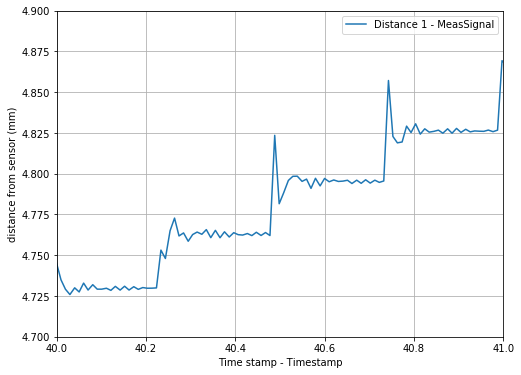

In [89]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

data_3 = pd.read_csv('../data/actuator_test_data_3.csv', skiprows=10, sep=';',decimal=',')
fig = data_3.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal", figsize=(8,6),grid="true")
fig.set_ylim(4.7,4.9)
fig.set_xlim(40,41)
fig.set_ylabel('distance from sensor (mm)')
plt.savefig('actuator_test_plot3.png', dpi=100)

In [14]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd

data_3 = pd.read_csv('../data/actuator_test_data_3.csv', skiprows=10, sep=';',decimal=',')
mintime = 0
maxtime = 0
for row in data_3.itertuples(index=False):
    mintime = min(row[data_3.columns.get_loc('Time stamp - Timestamp')], mintime)
    maxtime = max(row[data_3.columns.get_loc('Time stamp - Timestamp')], mintime)
print (mintime)
print (maxtime)

-8.42
93.2046


Statistics=0.997, p=0.845
0    0.031782
dtype: float64
0    0.001296
dtype: float64


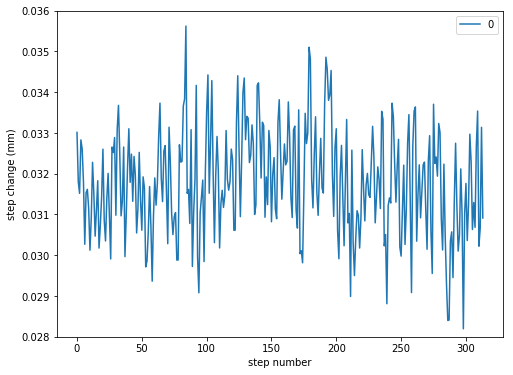

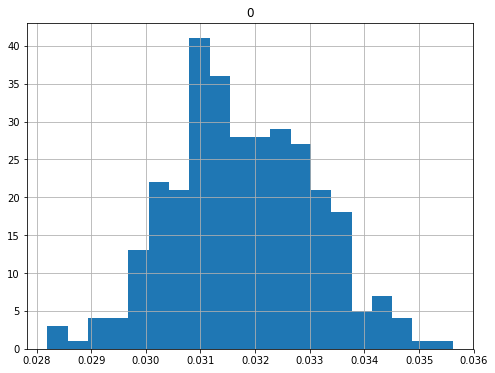

In [91]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
from scipy.stats import shapiro
prev_dist = 0
curr_dist = 0
ringing_count = 10
ringing_count_reset = 10
dist_threshold = 0.01
dist_accumulator = 0
dist_accumulator_count = 0
dist_avg_prev = 0
delta_min = 0.028
newdata = list()
data_3 = pd.read_csv('../data/actuator_test_data_3.csv', skiprows=10, sep=';',decimal=',')
for row in data_3.itertuples(index=False):
    curr_dist = row[data_3.columns.get_loc('Distance 1 - MeasSignal')]
    if ringing_count > 0:
        ringing_count -= 1
    elif abs(curr_dist - prev_dist) > dist_threshold:
        ringing_count = ringing_count_reset
        if dist_accumulator / dist_accumulator_count < 10:
            if (dist_accumulator / dist_accumulator_count) - dist_avg_prev > delta_min:
                newdata.append((dist_accumulator / dist_accumulator_count) - dist_avg_prev)
            dist_avg_prev = dist_accumulator / dist_accumulator_count
        dist_accumulator = 0
        dist_accumulator_count = 0
    else:
        dist_accumulator += row[data_3.columns.get_loc('Distance 1 - MeasSignal')]
        dist_accumulator_count += 1
    prev_dist = row[data_3.columns.get_loc('Distance 1 - MeasSignal')]
data_3_deltas = pd.DataFrame(newdata)
fig = data_3_deltas.plot(figsize=(8,6))
fig.set_ylim(0.028,0.036)
fig.set_ylabel('step change (mm)')
fig.set_xlabel('step number')
plt.savefig('actuator_test_plot4.png', dpi=100)
fig2 = data_3_deltas.hist(figsize=(8,6), bins=20)
plt.savefig('actuator_test_plot5.png', dpi=100)
stat, p = shapiro(data_3_deltas)
print('Statistics=%.3f, p=%.3f' % (stat, p))
print (data_3_deltas.mean())
print (data_3_deltas.std())

Text(0,0.5,'distance from sensor (mm)')

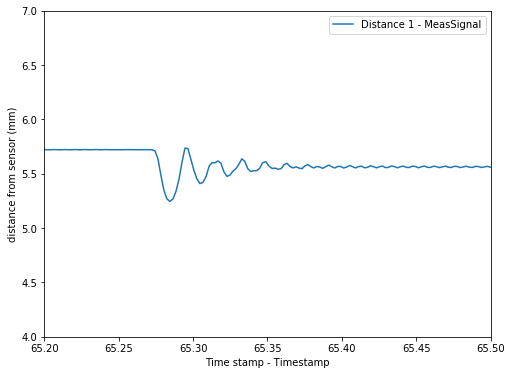

In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt

data_4 = pd.read_csv('../data/actuator_test_data_4.csv', skiprows=10, sep=';',decimal=',')
fig = data_4.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal",figsize=(8,6))
fig.set_ylim(4,7)
fig.set_xlim(65.2,65.5)
fig.set_ylabel('distance from sensor (mm)')

Text(0.5,0,'step number')

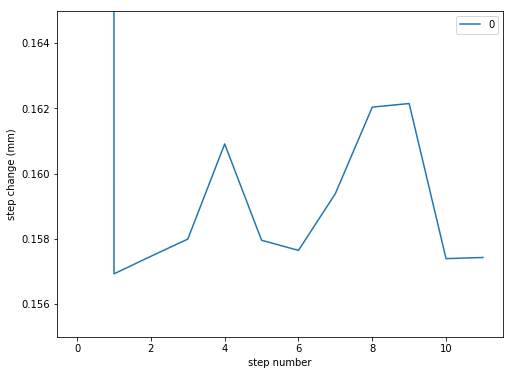

In [18]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
from scipy.stats import shapiro
prev_dist = 0
curr_dist = 0
ringing_count = 150
ringing_count_reset = 150
dist_threshold = 0.01
dist_accumulator = 0
dist_accumulator_count = 0
dist_avg_prev = 0
delta_min = 0.028
newdata = list()
data_4 = pd.read_csv('../data/actuator_test_data_4.csv', skiprows=10, sep=';',decimal=',')
for row in data_4.itertuples(index=False):
    curr_dist = row[data_4.columns.get_loc('Distance 1 - MeasSignal')]
    if ringing_count > 0:
        ringing_count -= 1
    elif abs(curr_dist - prev_dist) > dist_threshold:
        ringing_count = ringing_count_reset
        if dist_accumulator / dist_accumulator_count < 10:
            if (dist_accumulator / dist_accumulator_count) - dist_avg_prev > delta_min:
                newdata.append((dist_accumulator / dist_accumulator_count) - dist_avg_prev)
            dist_avg_prev = dist_accumulator / dist_accumulator_count
        dist_accumulator = 0
        dist_accumulator_count = 0
    else:
        dist_accumulator += row[data_4.columns.get_loc('Distance 1 - MeasSignal')]
        dist_accumulator_count += 1
    prev_dist = row[data_4.columns.get_loc('Distance 1 - MeasSignal')]
data_4_deltas = pd.DataFrame(newdata)
fig = data_4_deltas.plot(figsize=(8,6))
fig.set_ylim(0.155,0.165)
fig.set_ylabel('step change (mm)')
fig.set_xlabel('step number')

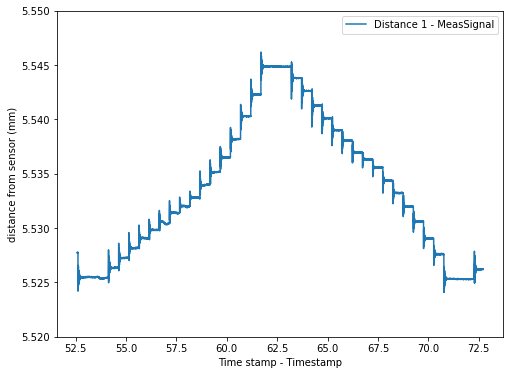

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import matplotlib.pyplot as plt

data_5 = pd.read_csv('../data/actuator_test_data_5.csv', skiprows=10, sep=';',decimal=',')
fig = data_5.plot(x="Time stamp - Timestamp", y="Distance 1 - MeasSignal",figsize=(8,6))
fig.set_ylim(5.52,5.55)
fig.set_ylabel('distance from sensor (mm)')
plt.savefig('actuator_test_plot7.png', dpi=100)